In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
!pip install pickle5
import pickle5 as pickle
import pprint

import gensim.models
import gensim.downloader

from sklearn.manifold import TSNE

plt.style.use('ggplot')

In [ ]:
pprint.pprint(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']


In [ ]:
wiki_model = gensim.downloader.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
words = ['word', 'freedom', 'trust', 'radical', 'democracy', 'privacy', 'safety',
         'right','police','healthcare','government','restriction','accountability',
         'correct','political','cancel','culture','constitution','conventional',
         'authoritarian','tradition','leadership']

In [ ]:
wiki_similar = {}

for _ in words:
    wiki_similar[_] = wiki_model.most_similar(_)


In [ ]:
all_words = {}

for i in words:
  all_words[f'{i}'] = [wiki_similar[i][j][0] for j in range(len(wiki_similar[i]))]



In [ ]:
wiki_words = pd.DataFrame(all_words)
wiki_words

,word,freedom,trust,radical,democracy,privacy,safety,right,police,healthcare,government,restriction,accountability,correct,political,cancel,culture,constitution,conventional,authoritarian,tradition,leadership
0,phrase,freedoms,mutual,militant,freedom,protections,protection,if,officers,health,administration,restrictions,transparency,incorrect,politics,postpone,cultural,constitutional,types,autocratic,traditions,political
1,meaning,rights,fund,extremist,unity,liberties,security,back,policemen,care,governments,limitation,oversight,fix,leadership,canceling,cultures,amendment,sophisticated,dictatorial,traditional,leaders
2,words,democracy,trusts,islamist,independence,confidentiality,health,left,authorities,services,officials,restricting,governance,wrong,social,canceled,traditions,rule,use,repressive,history,support
3,name,liberty,foundation,movement,political,protection,standards,way,arrested,medicare,authorities,limiting,fairness,corrected,democratic,cancellation,tradition,law,standard,totalitarian,culture,party
4,language,independence,public,islamic,movement,rights,environmental,put,guards,medical,opposition,requirement,integrity,appropriate,opposition,reschedule,religion,amendments,modern,regime,religious,position
5,literally,equality,funds,fundamentalist,opposition,workplace,problems,out,policeman,insurance,saying,limits,compliance,correcting,party,suspend,history,amended,unlike,regimes,religion,leader
6,names,dignity,property,radicals,peace,copyright,control,but,officials,education,official,prohibitions,discipline,explain,legal,cancelling,society,amend,using,despotic,faith,administration
7,text,liberties,investment,hardline,freedoms,laws,personnel,n't,soldiers,provider,country,limit,reform,change,influence,cancelled,civilization,laws,type,oppressive,ancient,responsibility
8,means,respect,insurance,leftist,peaceful,protected,quality,just,riot,providers,promised,prohibited,standards,answer,policy,plans,art,legislation,expensive,tyrannical,belief,policy
9,simply,free,institution,left-wing,pluralism,disclosure,inspection,not,armed,medicaid,military,bans,judicial,determine,leaders,defer,politics,legislature,existing,lukashenko,beliefs,coalition


In [ ]:
wiki_words.to_excel('wiki_similar_words.xlsx')

In [ ]:
def tsne_plot(model, vocab):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=0)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    fig, axs = plt.subplots(figsize=(8,8))
    axs.set_title('Word Clusters')
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        
    plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


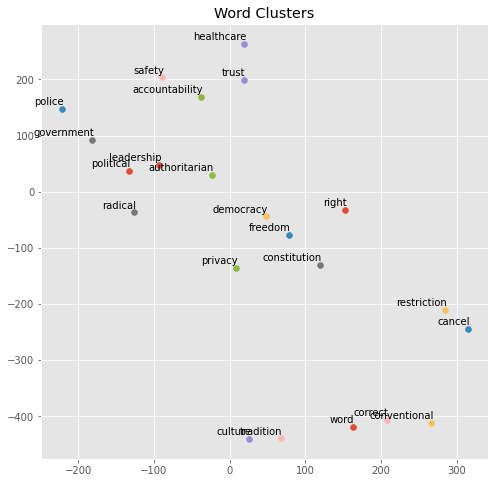

In [ ]:
tsne_plot(wiki_model, words)